In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline 

5


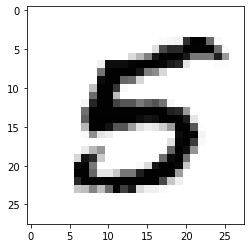

In [7]:
image_index = 20000
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

In [9]:
x_train.shape

(60000, 28, 28)

In [22]:
#reshaping the data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#normalize
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [25]:
from keras.models import Sequential 
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size = (3,3), input_shape = input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

W0806 09:49:45.262223 10268 deprecation_wrapper.py:119] From c:\users\peter ye\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0806 09:49:45.517541 10268 deprecation_wrapper.py:119] From c:\users\peter ye\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0806 09:49:45.719001 10268 deprecation_wrapper.py:119] From c:\users\peter ye\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0806 09:49:45.793801 10268 deprecation_wrapper.py:119] From c:\users\peter ye\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is depreca

In [26]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

W0806 09:51:33.253456 10268 deprecation_wrapper.py:119] From c:\users\peter ye\appdata\local\programs\python\python37\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0806 09:51:33.271408 10268 deprecation_wrapper.py:119] From c:\users\peter ye\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:3341: The name tf.log is deprecated. Please use tf.math.log instead.

W0806 09:51:33.728186 10268 deprecation.py:323] From c:\users\peter ye\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
60000/60000 [==============================] - 32s 535us/step - loss: 0.2127 - acc: 0.9351
Epoch 2/10
60000/60000 [==============================] - 30s 500us/step - loss: 0.0863 - acc: 0.9735
Epoch 3/10
60000/60000 [==============================] - 29s 485us/step - loss: 0.0595 - acc: 0.9814
Epoch 4/10
60000/60000 [==============================] - 27s 448us/step - loss: 0.0457 - acc: 0.9858
Epoch 5/10
60000/60000 [==============================] - 27s 449us/step - loss: 0.0365 - acc: 0.9876
Epoch 6/10
60000/60000 [==============================] - 27s 452us/step - loss: 0.0300 - acc: 0.9897
Epoch 7/10
60000/60000 [==============================] - 27s 450us/step - loss: 0.0250 - acc: 0.9915
Epoch 8/10
60000/60000 [==============================] - 27s 451us/step - loss: 0.0218 - acc: 0.9925
Epoch 9/10
60000/60000 [==============================] - 28s 460us/step - loss: 0.0193 - acc: 0.9937
Epoch 10/10
60000/60000 [==============================] - 28s 471us/step - loss: 

In [27]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 89us/step


[0.05492050493899624, 0.9854]